In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Cust_Spend_Data.csv')
dataset.head()

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3


In [3]:
dataset.describe()

,Cust_ID,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
count,10.00000,10.000000,10.000000,10.000000,10.0000,10.00000
mean,5.50000,4850.000000,4.000000,0.300000,4.3000,4.00000
std,3.02765,2877.595447,1.699673,0.483046,4.6916,3.05505
min,1.00000,1000.000000,2.000000,0.000000,1.0000,0.00000
25%,3.25000,2500.000000,3.000000,0.000000,1.0000,2.00000
50%,5.50000,5000.000000,3.500000,0.000000,1.5000,3.50000
75%,7.75000,6875.000000,5.000000,0.750000,8.2500,6.25000
max,10.00000,10000.000000,7.000000,1.000000,12.0000,9.00000


In [4]:
dataset.isnull().sum()

Cust_ID            0
Name               0
Avg_Mthly_Spend    0
No_Of_Visits       0
Apparel_Items      0
FnV_Items          0
Staples_Items      0
dtype: int64

In [5]:
dataset.columns

Index(['Cust_ID', 'Name', 'Avg_Mthly_Spend', 'No_Of_Visits', 'Apparel_Items',
       'FnV_Items', 'Staples_Items'],
      dtype='object')

Cust_ID               AxesSubplot(0.125,0.786098;0.352273x0.0939024)
Avg_Mthly_Spend    AxesSubplot(0.547727,0.786098;0.352273x0.0939024)
No_Of_Visits          AxesSubplot(0.125,0.673415;0.352273x0.0939024)
Apparel_Items      AxesSubplot(0.547727,0.673415;0.352273x0.0939024)
FnV_Items             AxesSubplot(0.125,0.560732;0.352273x0.0939024)
Staples_Items      AxesSubplot(0.547727,0.560732;0.352273x0.0939024)
dtype: object

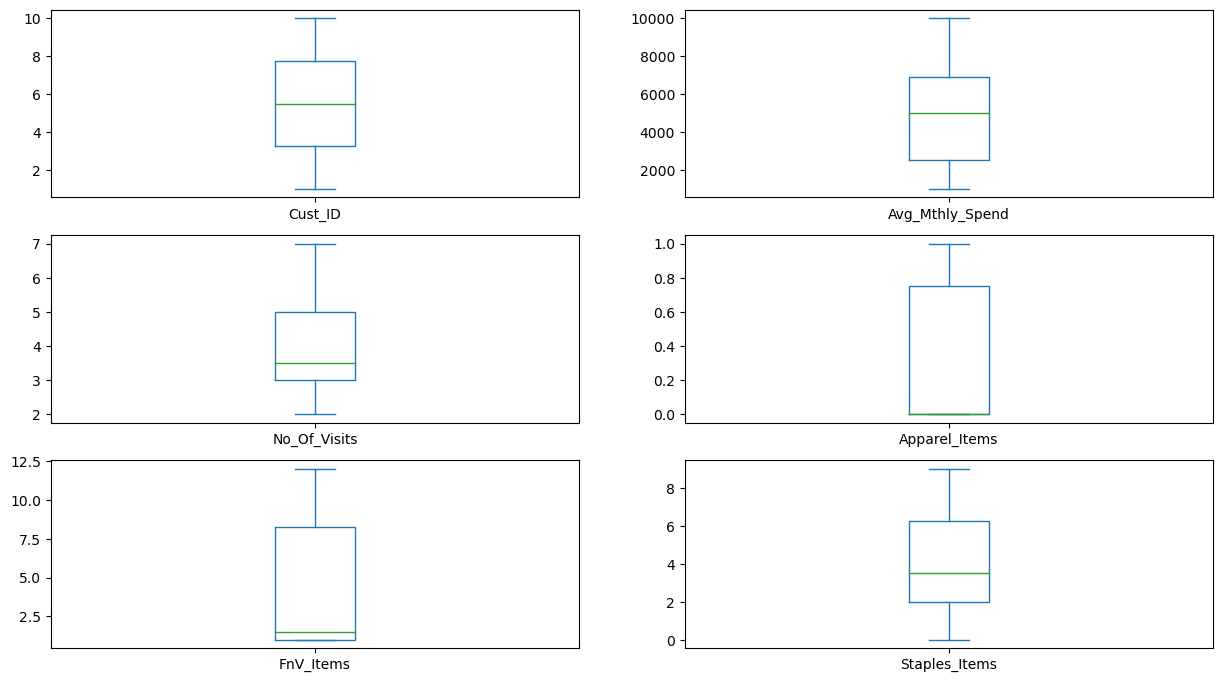

In [6]:
dataset.plot(kind='box', subplots=True, layout=(7,2), figsize=(15,20))

In [8]:
#Feature Scaling

data=dataset.iloc[:, 2:7].values #Standarzied the data to normal distribution
from sklearn import preprocessing
dataset_standarzied = preprocessing.scale(data)
dataset_standarzied = pd.DataFrame(dataset_standarzied)
print(dataset_standarzied)

          0         1         2         3         4
0  1.886498 -1.240347  1.527525 -0.741433 -1.380131
1  0.787567 -0.620174 -0.654654  1.280656  1.725164
2  0.787567  1.860521  1.527525 -0.292080  0.000000
3  0.604412  0.620174  1.527525 -0.741433  0.000000
4  0.421257  1.240347 -0.654654  1.730009 -0.345033
5 -0.311364 -0.620174 -0.654654 -0.741433  1.380131
6 -0.860829  0.620174 -0.654654  1.505333 -0.690066
7 -0.860829 -0.620174 -0.654654 -0.741433 -1.035098
8 -1.043984 -1.240347 -0.654654 -0.516756 -0.690066
9 -1.410294  0.000000 -0.654654 -0.741433  1.035098


C:\Users\Ekbal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


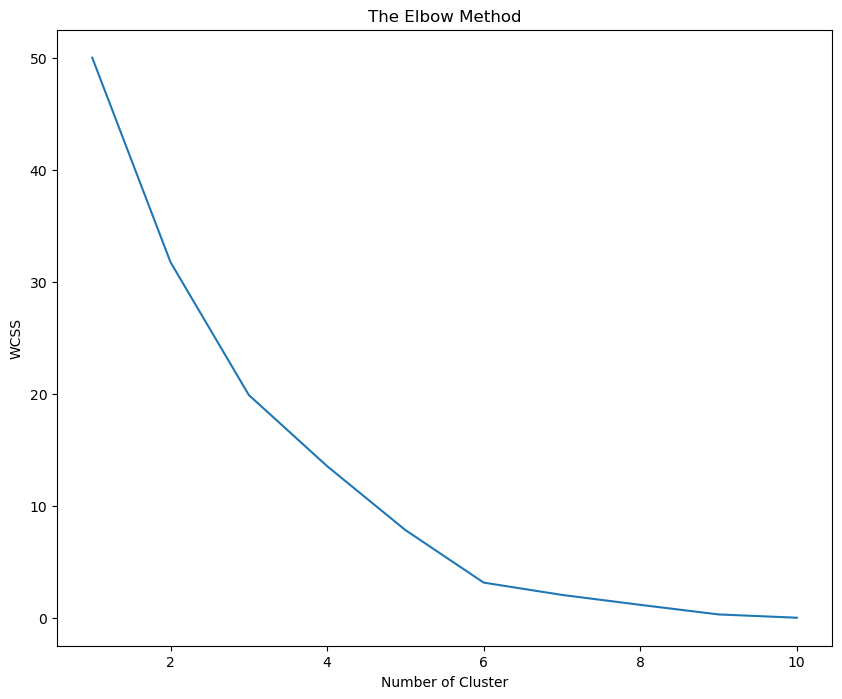

In [9]:
# WSS Plot or Elbow Curve for Optimal cluster identification
# find the appropriate cluster number

plt.figure(figsize=(10,8))
from sklearn.cluster import KMeans
wcss =[]
for i in range (1,11):
    kmeans= KMeans(n_clusters=i, init= 'k-means++', random_state=42)
    kmeans.fit(dataset_standarzied)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

K-Means Clustering & Cluster Information

In [13]:
# Fitting K-Means to the dataset

kmeans = KMeans(n_clusters=3, init= 'k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(dataset_standarzied)

#Begining of the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1

#New Dataframe called cluster
cluster= pd.DataFrame(y_kmeans1)
# Adding custer to the Dataset
dataset['cluster'] = cluster
# Mean of cluster to the Dataset
#dataset

kmeans_mean_cluster= pd.DataFrame(round(dataset.groupby('cluster').mean(),1))
#dataset
kmeans_mean_cluster

,Cust_ID,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
cluster,,,,,,
1,4.7,5166.7,4.7,0.0,11.0,4.7
2,8.2,2375.0,3.0,0.0,1.2,4.5
3,2.7,7833.3,4.7,1.0,1.7,2.7


In [11]:
dataset

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,cluster
0,1,A,10000,2,1,1,0,3
1,2,B,7000,3,0,10,9,1
2,3,C,7000,7,1,3,4,3
3,4,D,6500,5,1,1,4,3
4,5,E,6000,6,0,12,3,1
5,6,F,4000,3,0,1,8,2
6,7,G,2500,5,0,11,2,1
7,8,H,2500,3,0,1,1,2
8,9,I,2000,2,0,2,2,2
9,10,J,1000,4,0,1,7,2
